# Cluster countries

Import the required modules.

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.base import TransformerMixin
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
%matplotlib inline

## Problem setting

Let's try to cluster the countries baased on the indicators of happiness.

## Import data

In [3]:
data_2015 = pd.read_csv('Data/world_happiness_2015.csv')

In [4]:
data_2015.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


## Preprocess data

Define a class to extract data from a pandas DataFrame.

In [8]:
class FeatureSelector(BaseException, TransformerMixin):
    def __init__(self, feature_names):
        self._feature_names = feature_names
    def fit(self, X, Y=None):
        return self
    def transform(self, X):
        return X[self._feature_names].values

Define the names of the columns that hold numerical data.

In [11]:
num_attr_names = ['Economy (GDP per Capita)',
                  'Family', 'Health (Life Expectancy)', 'Freedom',
                  'Trust (Government Corruption)', 'Generosity',
                  'Dystopia Residual']

Create a pipeline for the numerical attributes, rescaling them after selection.

In [12]:
num_attrs_pipeline = Pipeline([
    ('select_num_attrs', FeatureSelector(num_attr_names)),
    ('scaler', MinMaxScaler()),
])

Run the pipeline to prepare the data.

In [47]:
prepared_data = num_attrs_pipeline.fit_transform(data_2015)

## Clustering

Create a k-means cluster algorithm for 3 clusters.

In [80]:
clusterer = KMeans(n_clusters=3)

Cluster the data, results will be in `clusterer.labels_`.

In [81]:
clusterer.fit(prepared_data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Add the cluster identifier to the original data set.

In [89]:
data_2015['Cluster'] = 0
for i in range(3):
    data_2015.loc[clusterer.labels_ == i, 'Cluster'] = i

Show the numerical attributes as a box plot for each of the three clusters.

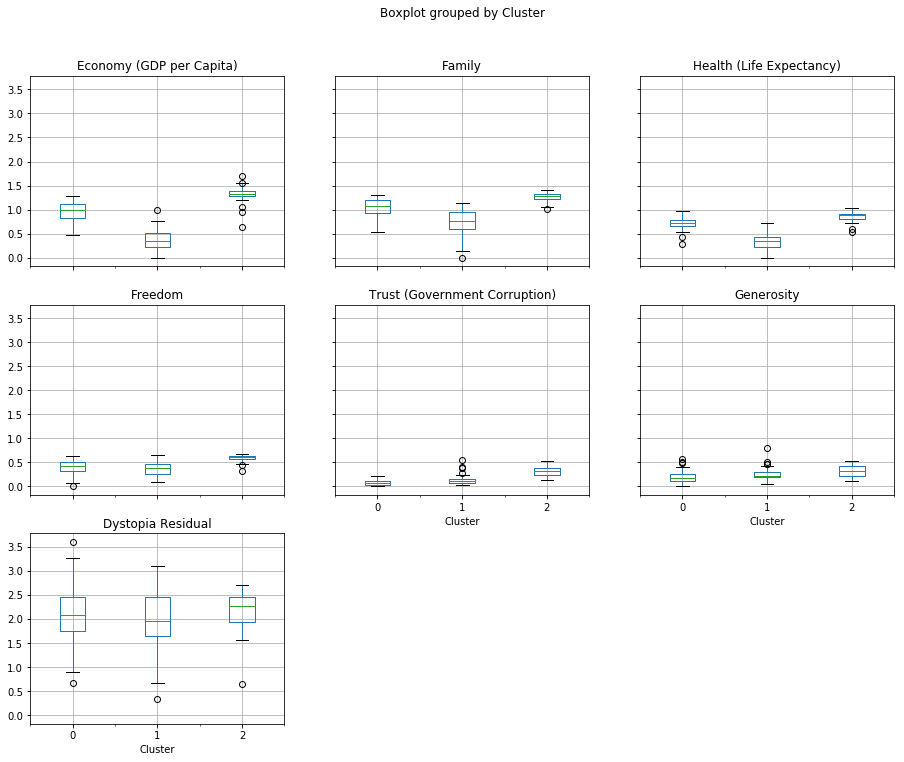

In [98]:
data_2015.boxplot(by='Cluster', column=num_attr_names, figsize=(15, 12));

Show the number of countries in each cluster.

In [106]:
data_2015.loc[:, ('Cluster', 'Country')].groupby('Cluster').count()

,Country
Cluster,
0,77
1,50
2,31


Show countries in cluster 2, which seems the most prosperous.

In [117]:
data_2015.loc[data_2015['Cluster'] == 2, ('Happiness Rank', 'Country')]

,Happiness Rank,Country
0,1,Switzerland
1,2,Iceland
2,3,Denmark
3,4,Norway
4,5,Canada
5,6,Finland
6,7,Netherlands
7,8,Sweden
8,9,New Zealand
9,10,Australia
